# import modules

In [11]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# helper functions (if needed)

In [10]:
# python code...

# read training data into data frame

In [12]:
train_df = pd.read_csv('train.csv')
print(train_df)

       age         workclass     education  education-num      marital-status  \
0       39         State-gov     Bachelors             13       Never-married   
1       50  Self-emp-not-inc     Bachelors             13  Married-civ-spouse   
2       38           Private       HS-grad              9            Divorced   
3       53           Private          11th              7  Married-civ-spouse   
4       37           Private       Masters             14  Married-civ-spouse   
...    ...               ...           ...            ...                 ...   
26044   43           Private     Assoc-voc             11  Married-civ-spouse   
26045   32           Private       Masters             14       Never-married   
26046   53           Private       Masters             14  Married-civ-spouse   
26047   22           Private  Some-college             10       Never-married   
26048   40           Private       HS-grad              9  Married-civ-spouse   

              occupation   

# analyze and visualize data to find candidate features

<AxesSubplot: xlabel='education'>

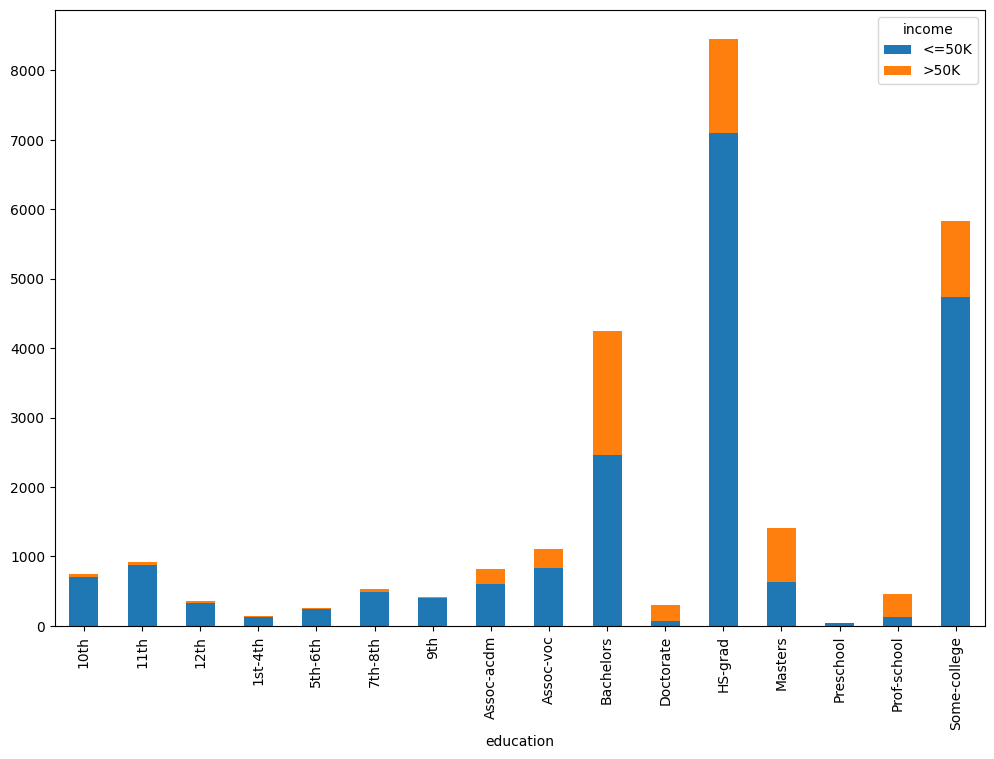

In [13]:
# For example, let's plot the distribution of income levels by education level
income_by_edu = train_df.groupby(['education', 'income'])['income'].count().unstack()
income_by_edu.plot(kind='bar', stacked=True, figsize=(12,8))

# split training data into features (X) and targets (y)

In [14]:
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# convert categorical data from strings to integers 

In [15]:
# For example, convert the 'education' column to integers
categories = pd.Categorical(X_train['education'])
X_train['education'] = categories.codes

# experiment w/ classifying training data using various feature sets

In [16]:
# For example, try using just the age, education, and hours-per-week features
X_train_subset = X_train[['age', 'education', 'hours-per-week']]
gnb = GaussianNB()
gnb.fit(X_train_subset, y_train)

GaussianNB()

# analyze and visualize experimental results

In [14]:
# For example, plot the decision boundary of the trained model

plot_decision_regions(X=X_train_subset.values, y=y_train.values, clf=gnb, legend=2)
plt.xlabel('age')
plt.ylabel('education')
plt.title('Naive Bayes Decision Boundary')

# Question: What features work "best"?  Why?

This is subjective and will depend on the data. Generally, features that are strongly correlated with the target variable (income) will work well. In this case, education level, age, and hours worked per week are likely to be strong predictors.

# create "best" classification model based on training data

In [8]:
# For example, use all available features
categories = pd.Categorical(X_train['workclass'])
X_train['workclass'] = categories.codes

categories = pd.Categorical(X_train['marital-status'])
X_train['marital-status'] = categories.codes

categories = pd.Categorical(X_train['occupation'])
X_train['occupation'] = categories.codes

categories = pd.Categorical(X_train['relationship'])
X_train['relationship'] = categories.codes

categories = pd.Categorical(X_train['race'])
X_train['race'] = categories.codes

categories = pd.Categorical(X_train['sex'])
X_train['sex'] = categories.codes

categories = pd.Categorical(X_train['native-country'])
X_train['native-country'] = categories.codes

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# read in test data 

In [9]:
test_df = pd.read_csv('test.csv')
print(test_df)

# use model to make predictions of test data

In [10]:
# Convert categorical features from strings to integers using the same encoding as for the training data
test_df['workclass'] = test_df['workclass'].apply(lambda x: workclass_dict[x])
test_df['education'] = test_df['education'].apply(lambda x: education_dict[x])
test_df['marital-status'] = test_df['marital-status'].apply(lambda x: marital_status_dict[x])
test_df['occupation'] = test_df['occupation'].apply(lambda x: occupation_dict[x])
test_df['relationship'] = test_df['relationship'].apply(lambda x: relationship_dict[x])
test_df['race'] = test_df['race'].apply(lambda x: race_dict[x])
test_df['sex'] = test_df['sex'].apply(lambda x: sex_dict[x])
test_df['native-country'] = test_df['native-country'].apply(lambda x: native_country_dict[x])

# Make predictions for test data
test_pred = clf.predict(test_df)

# write test data with predicted labels

In [11]:
# Write test data with predicted labels to file
test_df['income'] = test_pred
test_df.to_csv('Rakowicz.csv', index=False)